In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'NEU_DET/Train_IMAGES',  # This is the source directory for training images
        target_size=(200,200),  # All images will be resized to 200 x 200
        color_mode='grayscale',
        batch_size = 32,  # 24, 12  test
        # Specify the classes explicitly
        classes = ['crazing','inclusion','patches','pitted_surface','rolled_in_scale','scratches'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')


# All images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
test_generator = test_datagen.flow_from_directory(
        'NEU_DET/Test_IMAGES',  # This is the source directory for training images
        target_size=(200,200),  # All images will be resized to 200 x 200
        color_mode='grayscale',
        batch_size = 32,  # 24
        # Specify the classes explicitly
        classes = ['crazing','inclusion','patches','pitted_surface','rolled_in_scale','scratches'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')


Found 1632 images belonging to 6 classes.
Found 168 images belonging to 6 classes.


In [2]:
train_generator.class_indices

{'crazing': 0,
 'inclusion': 1,
 'patches': 2,
 'pitted_surface': 3,
 'rolled_in_scale': 4,
 'scratches': 5}

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 6 output neurons for 6 classes with the softmax activation
    tf.keras.layers.Dense(6, activation='softmax')
])


In [4]:

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])


In [6]:
total_sample=train_generator.n

total_sample

1632

In [7]:
history = model.fit(
        train_generator,
        validation_data = test_generator,
        steps_per_epoch = 51,
        epochs = 20,)


Epoch 1/20
51/51 [==============================] - 44s 773ms/step - loss: 1.7623 - acc: 0.2245 - val_loss: 1.8277 - val_acc: 0.2262
Epoch 2/20
51/51 [==============================] - 35s 676ms/step - loss: 1.4515 - acc: 0.4081 - val_loss: 1.0744 - val_acc: 0.5893
Epoch 3/20
51/51 [==============================] - 35s 682ms/step - loss: 1.0282 - acc: 0.6471 - val_loss: 0.5900 - val_acc: 0.8333
Epoch 4/20
51/51 [==============================] - 34s 673ms/step - loss: 0.8450 - acc: 0.7296 - val_loss: 2.1827 - val_acc: 0.4107
Epoch 5/20
51/51 [==============================] - 34s 673ms/step - loss: 0.8649 - acc: 0.7410 - val_loss: 0.3376 - val_acc: 0.9226
Epoch 6/20
51/51 [==============================] - 34s 672ms/step - loss: 0.4754 - acc: 0.8447 - val_loss: 0.3851 - val_acc: 0.9048
Epoch 7/20
51/51 [==============================] - 33s 652ms/step - loss: 0.4075 - acc: 0.8739 - val_loss: 0.1918 - val_acc: 0.9583
Epoch 8/20
51/51 [==============================] - 34s 674ms/step - 

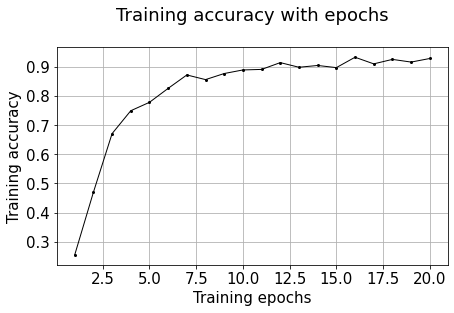

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(20)],history.history['acc'],'-o',c='k',lw=1,markersize=2)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
